Decision Tree RMSE: 1.4123197892849265e-05
Random Forest RMSE: 1.4194119820267908e-05
Linear Regression RMSE: 2.911105269263793e-14


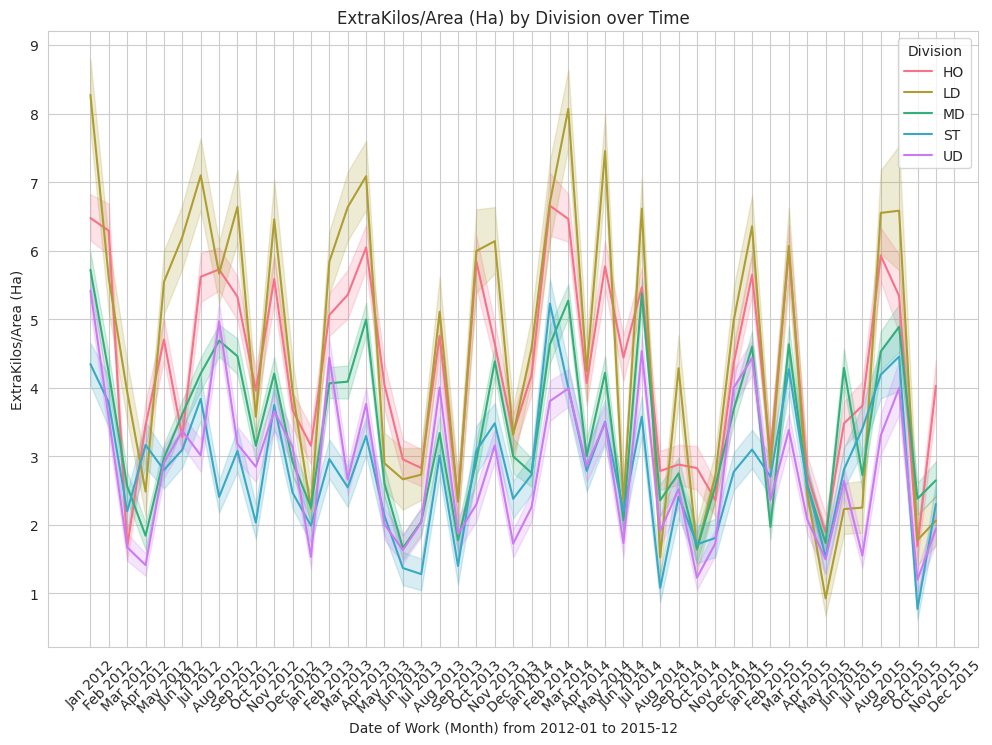

In [1]:
# Import additional libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Data preprocessing
# Calculate Productivity
df['Productivity'] = df['ExtraKilos'] / df['Area (Ha)']

# Convert DateofWork to datetime and extract month
df['DateofWork'] = pd.to_datetime(df['DateofWork'])

# Create a new column for month
df['Month'] = df['DateofWork'].dt.to_period('M').dt.strftime('%Y-%m')

# One-hot encode Division
df = pd.get_dummies(df, columns=['Division'])

# Initialize variables for evaluation
division_columns = [col for col in df.columns if col.startswith('Division_')]
X = df[['Productivity'] + division_columns]
y = df['Productivity']  # Change the target variable to 'Productivity'

# Initialize lists to store evaluation results
decision_tree_rmse = []
random_forest_rmse = []
linear_regression_rmse = []

# Number of Bootstrapped samples
n_samples = 100

# Perform Bootstrapping and model evaluation
for _ in range(n_samples):
    # Create Bootstrapped samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Decision Tree
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    decision_tree_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_dt)))

    # Random Forest
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    random_forest_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_rf)))

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    linear_regression_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Evaluate and compare models
print("Decision Tree RMSE:", np.mean(decision_tree_rmse))
print("Random Forest RMSE:", np.mean(random_forest_rmse))
print("Linear Regression RMSE:", np.mean(linear_regression_rmse))

# Visualize ExtraKilos/Area (Ha) by Division over time
# Create a line plot for each division

# Define the date range from January 2012 to December 2015
start_date = pd.to_datetime("2012-01-01")
end_date = pd.to_datetime("2015-12-31")

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("husl", len(division_columns))

# Generate month labels for the entire duration period
month_labels = [start_date + pd.DateOffset(months=i) for i in range(48)]  # 48 months from Jan 2012 to Dec 2015

for division_column in division_columns:
    division_name = division_column.split("_")[1]
    division_data = df[df[division_column] == 1]

    # Filter the data for the specified date range
    division_data = division_data[(division_data['DateofWork'] >= start_date) & (division_data['DateofWork'] <= end_date)]
    
    sns.lineplot(data=division_data, x='Month', y='Productivity', label=division_name)

plt.xlabel('Date of Work (Month) from 2012-01 to 2015-12')
plt.xticks(range(len(month_labels)), [label.strftime('%b %Y') for label in month_labels], rotation=45)
plt.ylabel('ExtraKilos/Area (Ha)')
plt.title('ExtraKilos/Area (Ha) by Division over Time')
plt.legend(title='Division')
plt.show()

# Summarize knowledge gained
# Discuss insights, model comparisons, and the updated visualization


Decision Tree RMSE: 3.372967324767245
Random Forest RMSE: 3.372978353807136


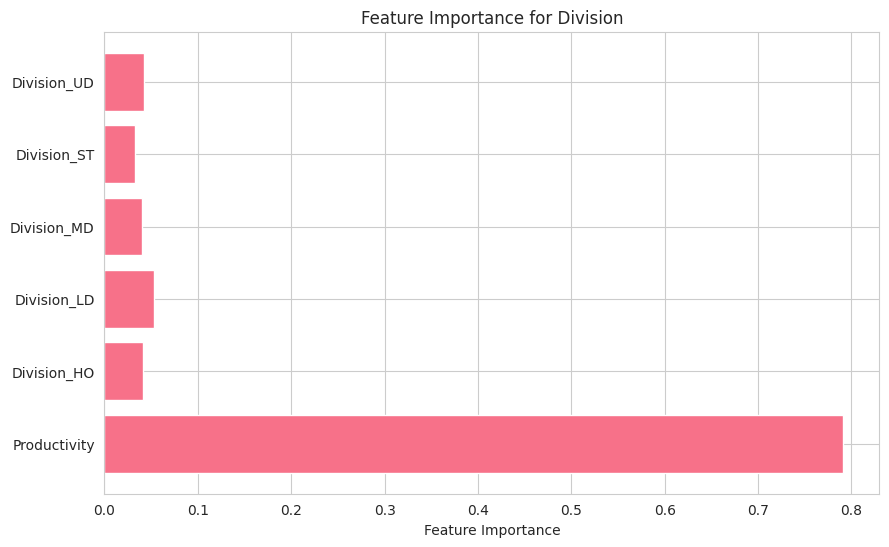

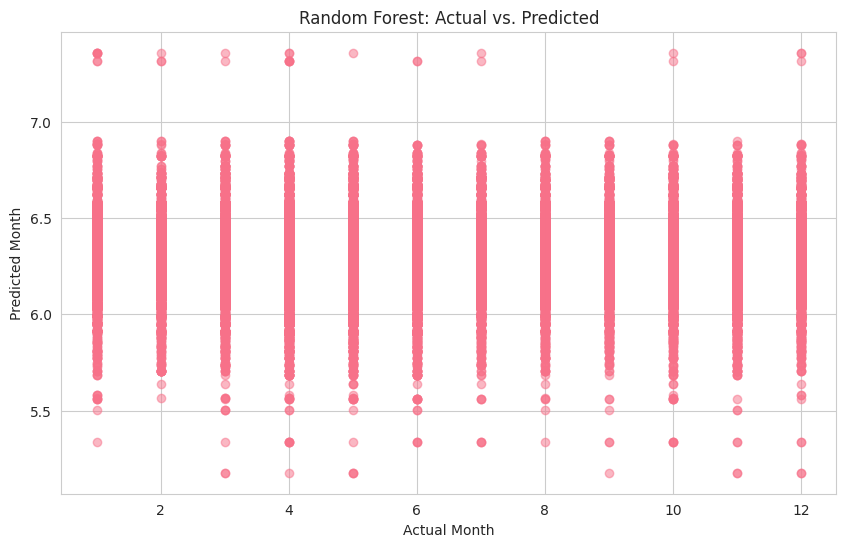

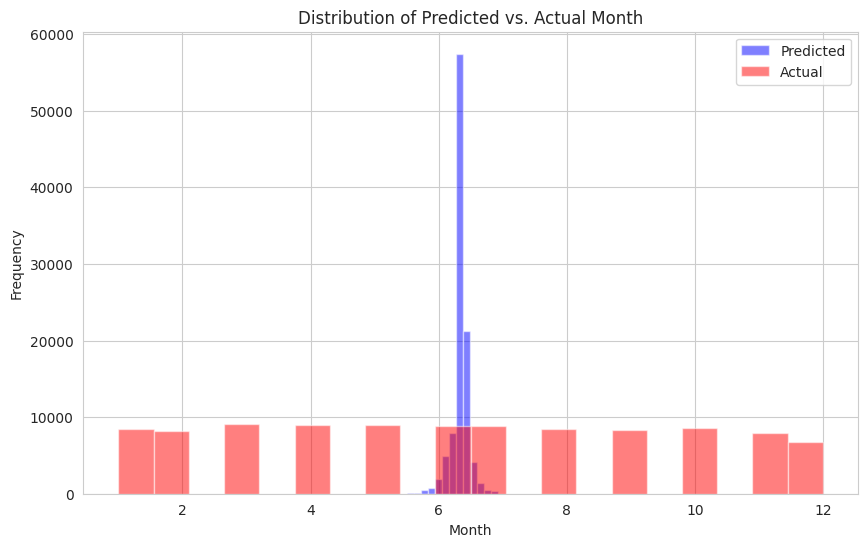

In [22]:
# Evaluate and compare models
print("Decision Tree RMSE:", np.mean(decision_tree_rmse))
print("Random Forest RMSE:", np.mean(random_forest_rmse))

# Visualize feature importance (for example, Division)
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Division')
plt.show()

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Month')
plt.ylabel('Predicted Month')
plt.title('Random Forest: Actual vs. Predicted')
plt.show()

# Additional visualization: Distribution of predicted values
plt.figure(figsize=(10, 6))
plt.hist(y_pred_rf, bins=20, alpha=0.5, color='blue', label='Predicted')
plt.hist(y_test, bins=20, alpha=0.5, color='red', label='Actual')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs. Actual Month')
plt.legend()
plt.show()

# You can also add hyperparameter tuning for the models if needed

# Summarize knowledge gained
# Discuss insights, model comparisons, and any further steps for improvement
